In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
google_colab = input('Running on Colab?\n')
if google_colab=='yes' : 
    BASE_DIR = 'University/UC3M/TFM/cnp_repo/neural-processes'

    # Load the Drive helper and mount
    from google.colab import drive

    # This will prompt for authorization.
    drive.mount('/content/drive')

      # Change to assignment directory ('Lab_Exercises_DASS/Lab_Exercise4' by default)
    import os
    os.chdir(f'/content/drive/My Drive/{BASE_DIR}')
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')
    os.chdir(BASE_DIR)

    
# custom imports
from cnp.trainer import RegressionTrainer
from cnp.datageneration import DataGenerator
from cnp.helpers import Helper
from cnp.cnp import RegressionCNP


# import utils
import json
from datetime import date

Running on Colab?
no
Top level directory is set to /Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes


In [3]:

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']
config_dir = os.path.join('configs')

## Simple Mean Experiment 

In [4]:
with open(os.path.join(config_dir,'paper_model_config_simple_aggregation.json')) as f:
    file = f.read()
    default_conf = json.loads(file)

In [5]:
default_conf

{'cnp_params': {'dimout': 2,
  'dimr': 128,
  'dimx': 1,
  'dimy': 1,
  'dropout': 0,
  'max_contx': 10,
  'max_funcs': 10,
  'min_contx': 3,
  'min_funcs': 2,
  'fix_num_contxt': False,
  'num_layers_decoder': 3,
  'num_layers_encoder': 4,
  'num_neurons_decoder': 128,
  'num_neurons_encoder': 128,
  'aggregation_kwargs': {'aggregator': None,
   'simple_aggregator_type': 'mean'}},
 'data_kwargs': {'datagenerator': 'cnp.datageneration.GaussianProcess',
  'num_instances_train': 64,
  'num_instances_vali': 10,
  'num_instances_test': 10,
  'noise': 0.0004,
  'length_scale': 0.4,
  'gamma': 1},
 'experiment_params': {'dim_observation': 400,
  'lr': 0.001,
  'n_epochs': 200000,
  'range_x': [-2, 2],
  'seed': None,
  'dimx': 1,
  'train_on_gpu': False},
 'train_kwargs': {'batch_size_train': 64,
  'batch_size_vali': 3,
  'batch_size_test': 3,
  'plotting': True,
  'print_after': 5000}}

In [6]:
CondNeuralProcess = RegressionCNP(**default_conf['cnp_params'])

Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=129, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)
None


In [7]:
trainer = RegressionTrainer(
    cnp=CondNeuralProcess,
    data_kwargs=default_conf['data_kwargs'],
    **default_conf['experiment_params'])
                         

  0%|          | 0/200000 [00:00<?, ?it/s]

Mean training loss at epoch 0 :                         1.586
Mean Validation loss after 0 equals                     1.469

Validation loss for the function plotted:                 1.059


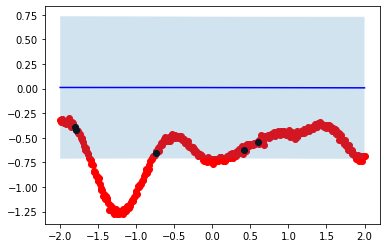

  2%|▏         | 4994/200000 [01:14<48:57, 66.38it/s]  

Mean training loss at epoch 5000 :                         1.249
Mean Validation loss after 5000 equals                     1.926

Validation loss for the function plotted:                 1.786


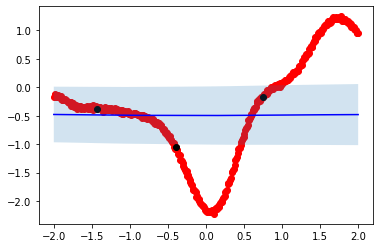

  5%|▍         | 9996/200000 [02:39<44:38, 70.93it/s]  

Mean training loss at epoch 10000 :                         0.336
Mean Validation loss after 10000 equals                     3.324

Validation loss for the function plotted:                 9.104


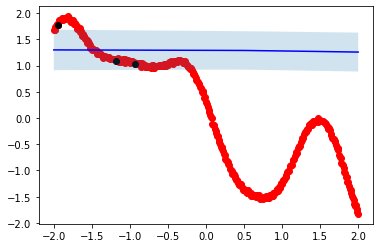

  8%|▊         | 15000/200000 [03:52<42:01, 73.36it/s]  

Mean training loss at epoch 15000 :                         1.311
Mean Validation loss after 15000 equals                     2.307

Validation loss for the function plotted:                 4.521


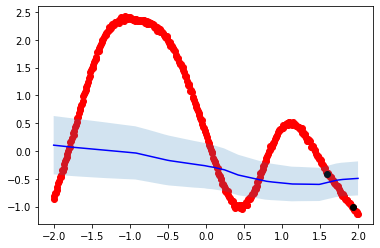

 10%|▉         | 19996/200000 [05:07<48:53, 61.37it/s]  

Mean training loss at epoch 20000 :                         -0.051
Mean Validation loss after 20000 equals                     1.264

Validation loss for the function plotted:                 0.427


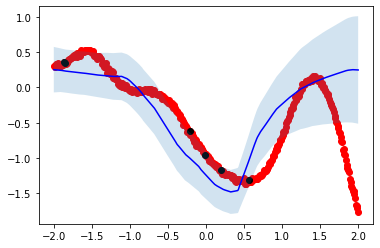

 12%|█▏        | 24995/200000 [06:29<45:43, 63.78it/s]  

Mean training loss at epoch 25000 :                         0.288
Mean Validation loss after 25000 equals                     1.516

Validation loss for the function plotted:                 1.328


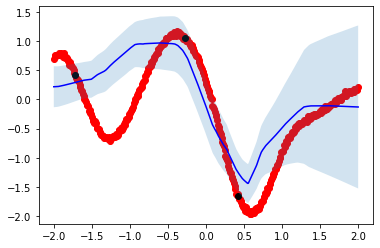

 15%|█▍        | 29997/200000 [07:56<46:09, 61.39it/s]  

Mean training loss at epoch 30000 :                         0.562
Mean Validation loss after 30000 equals                     1.431

Validation loss for the function plotted:                 2.234


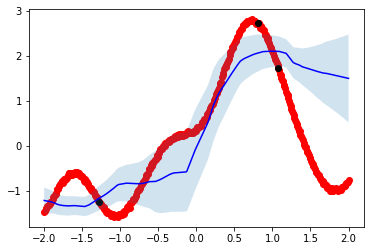

 17%|█▋        | 34994/200000 [09:29<51:15, 53.65it/s]  

Mean training loss at epoch 35000 :                         0.316
Mean Validation loss after 35000 equals                     1.356

Validation loss for the function plotted:                 0.119


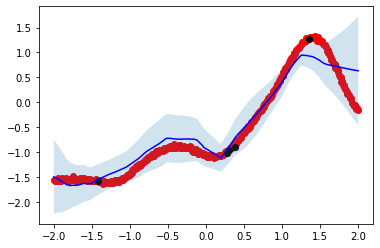

 20%|█▉        | 39995/200000 [11:00<40:07, 66.47it/s]  

Mean training loss at epoch 40000 :                         -0.563
Mean Validation loss after 40000 equals                     0.939

Validation loss for the function plotted:                 0.086


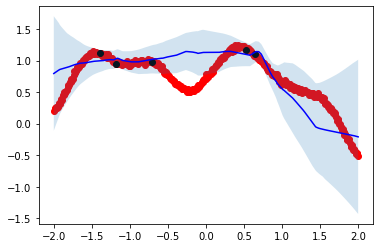

 22%|██▎       | 45000/200000 [12:42<44:44, 57.73it/s]  

Mean training loss at epoch 45000 :                         -0.076
Mean Validation loss after 45000 equals                     1.002

Validation loss for the function plotted:                 1.129


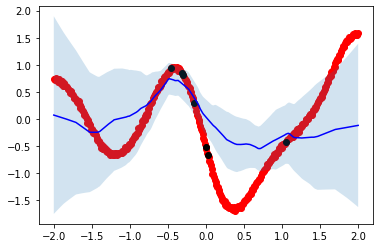

 25%|██▍       | 49998/200000 [14:43<57:08, 43.75it/s]  

Mean training loss at epoch 50000 :                         0.0
Mean Validation loss after 50000 equals                     1.603

Validation loss for the function plotted:                 1.331


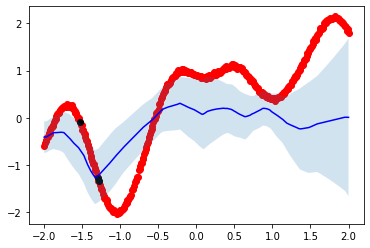

 27%|██▋       | 54999/200000 [16:49<56:24, 42.84it/s]  

Mean training loss at epoch 55000 :                         0.344
Mean Validation loss after 55000 equals                     1.699

Validation loss for the function plotted:                 0.537


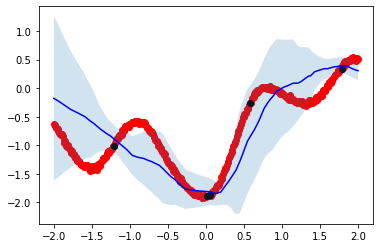

 30%|██▉       | 59999/200000 [18:41<1:07:14, 34.70it/s]

Mean training loss at epoch 60000 :                         -0.922
Mean Validation loss after 60000 equals                     0.861

Validation loss for the function plotted:                 1.683


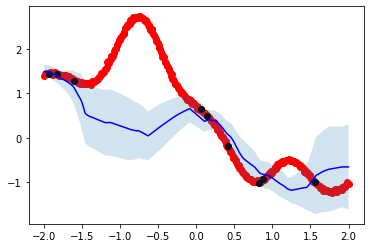

 32%|███▏      | 64995/200000 [20:40<52:44, 42.66it/s]  

Mean training loss at epoch 65000 :                         -0.417
Mean Validation loss after 65000 equals                     1.523

Validation loss for the function plotted:                 1.72


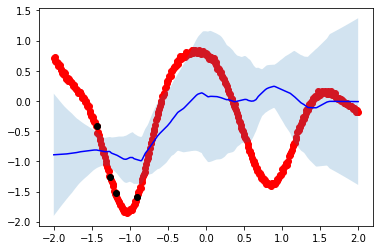

 35%|███▍      | 69997/200000 [23:14<2:11:27, 16.48it/s] 

Mean training loss at epoch 70000 :                         -0.416
Mean Validation loss after 70000 equals                     1.334

Validation loss for the function plotted:                 1.896


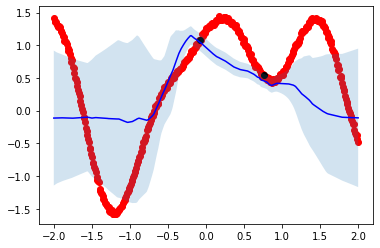

 37%|███▋      | 74997/200000 [25:26<45:58, 45.31it/s]  

Mean training loss at epoch 75000 :                         0.138
Mean Validation loss after 75000 equals                     0.918

Validation loss for the function plotted:                 0.737


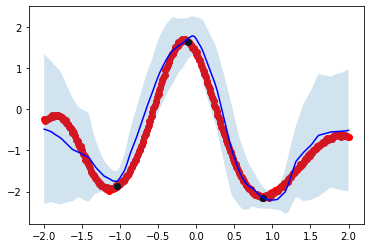

 40%|████      | 80000/200000 [27:43<44:33, 44.88it/s]  

Mean training loss at epoch 80000 :                         -0.522
Mean Validation loss after 80000 equals                     0.965

Validation loss for the function plotted:                 0.313


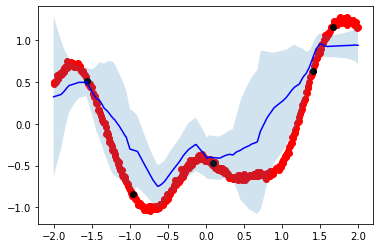

 42%|████▏     | 84997/200000 [29:45<50:25, 38.01it/s]  

Mean training loss at epoch 85000 :                         -0.232
Mean Validation loss after 85000 equals                     1.655

Validation loss for the function plotted:                 0.467


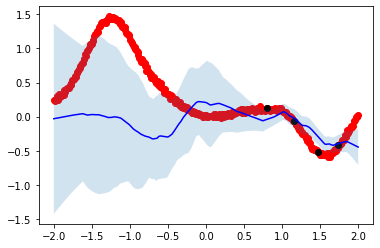

 45%|████▌     | 90000/200000 [32:03<58:35, 31.29it/s]  

Mean training loss at epoch 90000 :                         0.089
Mean Validation loss after 90000 equals                     1.272

Validation loss for the function plotted:                 1.252


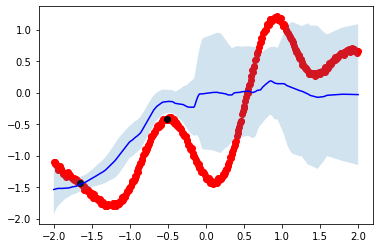

 47%|████▋     | 94997/200000 [34:10<37:03, 47.22it/s]  

Mean training loss at epoch 95000 :                         -0.56
Mean Validation loss after 95000 equals                     0.96

Validation loss for the function plotted:                 2.143


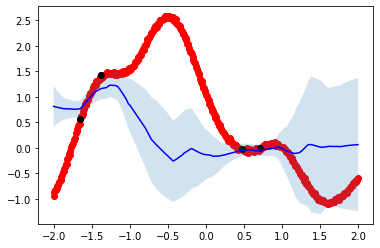

 50%|████▉     | 99997/200000 [36:05<39:49, 41.84it/s]  

Mean training loss at epoch 100000 :                         0.009
Mean Validation loss after 100000 equals                     0.798

Validation loss for the function plotted:                 0.57


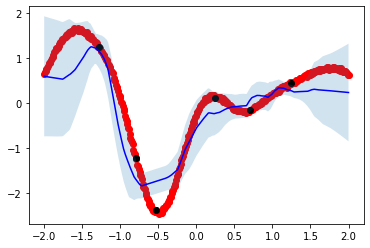

 52%|█████▎    | 105000/200000 [38:10<40:57, 38.65it/s]  

Mean training loss at epoch 105000 :                         -0.186
Mean Validation loss after 105000 equals                     1.345

Validation loss for the function plotted:                 0.508


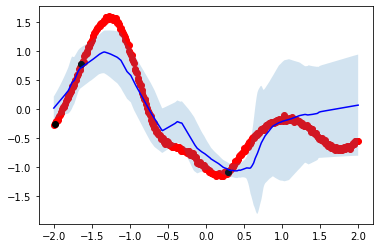

 55%|█████▍    | 109999/200000 [40:01<30:52, 48.58it/s]  

Mean training loss at epoch 110000 :                         1.082
Mean Validation loss after 110000 equals                     0.774

Validation loss for the function plotted:                 0.427


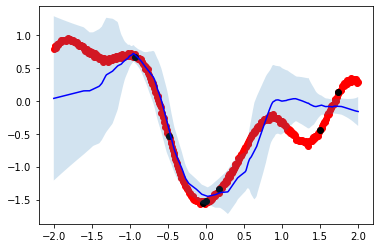

 57%|█████▊    | 115000/200000 [41:52<33:09, 42.72it/s]

Mean training loss at epoch 115000 :                         0.229
Mean Validation loss after 115000 equals                     1.206

Validation loss for the function plotted:                 1.174


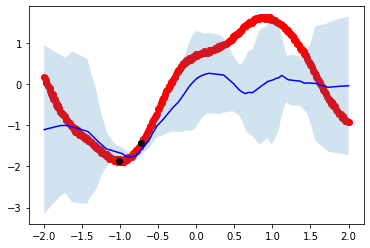

 60%|█████▉    | 119998/200000 [43:55<36:03, 36.98it/s]  

Mean training loss at epoch 120000 :                         -0.192
Mean Validation loss after 120000 equals                     1.029

Validation loss for the function plotted:                 0.63


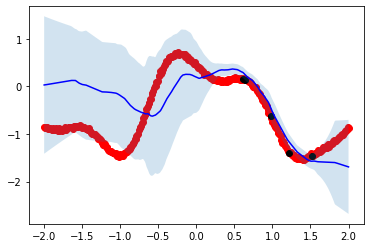

 62%|██████▏   | 124996/200000 [45:46<26:11, 47.74it/s]  

Mean training loss at epoch 125000 :                         -0.168
Mean Validation loss after 125000 equals                     1.375

Validation loss for the function plotted:                 1.08


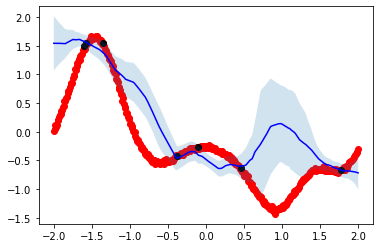

 65%|██████▌   | 130000/200000 [47:42<31:58, 36.48it/s]  

Mean training loss at epoch 130000 :                         -0.741
Mean Validation loss after 130000 equals                     1.162

Validation loss for the function plotted:                 2.089


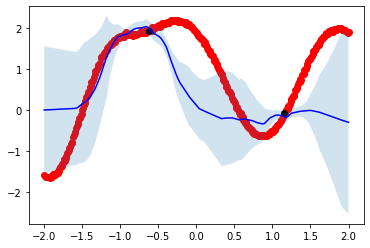

 67%|██████▋   | 134998/200000 [49:37<24:05, 44.97it/s]  

Mean training loss at epoch 135000 :                         -0.039
Mean Validation loss after 135000 equals                     1.621

Validation loss for the function plotted:                 1.585


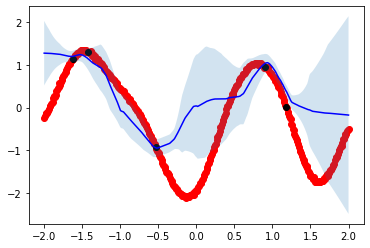

 70%|██████▉   | 139999/200000 [51:31<20:19, 49.20it/s]  

Mean training loss at epoch 140000 :                         -0.214
Mean Validation loss after 140000 equals                     1.024

Validation loss for the function plotted:                 0.659


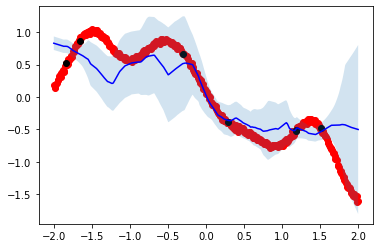

 72%|███████▏  | 144999/200000 [53:17<19:19, 47.42it/s]

Mean training loss at epoch 145000 :                         -0.329
Mean Validation loss after 145000 equals                     0.785

Validation loss for the function plotted:                 0.603


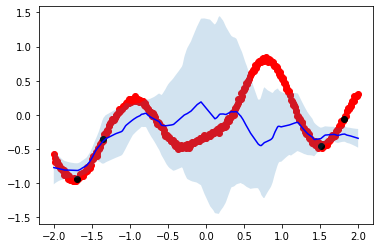

 74%|███████▍  | 148747/200000 [54:46<17:33, 48.65it/s]  

In [ ]:
state_dict_encoder, state_dict_decoder, state_dict_aggregator, train_loss, vali_loss = trainer.run_training(
    batch_size_train=default_conf['train_kwargs']['batch_size_train'],
    batch_size_vali=default_conf['train_kwargs']['batch_size_vali'],
    print_after=default_conf['train_kwargs']['print_after'])

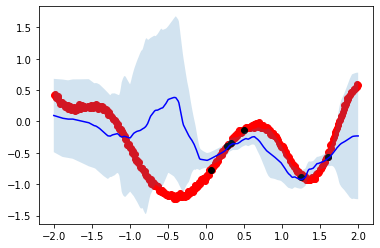

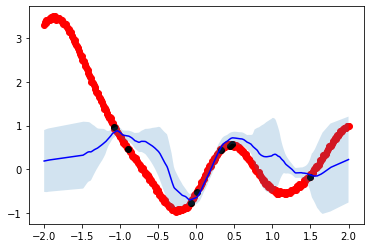

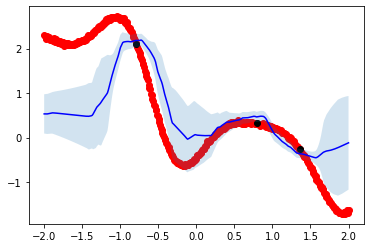

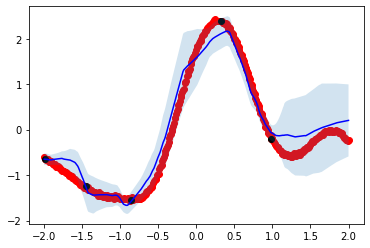

0.40400904417037964


In [11]:
MSE = trainer.run_test(encoder_state_dict=state_dict_encoder,
              decoder_state_dict=state_dict_decoder,
              aggregator_state_dict=state_dict_aggregator,
              batch_size_test=default_conf['train_kwargs']['batch_size_test'])
print(MSE)

In [26]:
values = [state_dict_encoder, state_dict_decoder, state_dict_aggregator, train_loss, vali_loss, MSE]
names = ['encoder', 'decoder', 'aggregator', 'train_loss', 'vali_loss', 'mse']
to_save = [(name, value) for name, value in zip(names, values)]
directory = os.path.join(BASE_DIR,'experiments/results')


Helper.save_results('', '1dpaper_simple_mean_agregation', to_save)


In [24]:
google_colab

'yes'

In [21]:
!ls 

architecture_improvement  neural_processes.egg-info  setup.py
cnp			  notebooks		     test
configs			  notes			     tests
data			  README.md		     tfm
experiments		  requirements_local.txt
LICENSE			  requirements.txt


In [22]:
! rmdir test